In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bb2e350e73636b41f18d033b2ab9051b


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

atuona pf
vila velha br
belushya guba ru
hirara jp
taoudenni ml
zima ru
broome au
kristiinankaupunki fi
sabha ly
albany au
cape town za
brae gb
punta arenas cl
georgetown sh
dingle ie
port elizabeth za
gizo sb
hovd mn
upernavik gl
tuktoyaktuk ca
khatanga ru
tasiilaq gl
amga ru
sonoita mx
leshukonskoye ru
ushuaia ar
naze jp
tessalit ml
grindavik is
rikitea pf
esperance au
port alfred za
mataura pf
thompson ca
gurskoye ru
norman wells ca
hermanus za
brooks ca
atuona pf
ushuaia ar
hermanus za
gagnoa ci
bredasdorp za
hermanus za
atuona pf
mataura pf
bennettsville us
birjand ir
ushuaia ar
khor qa
tuktoyaktuk ca
bredasdorp za
cidreira br
albany au
taolanaro mg
aliaga tr
dikson ru
amderma ru
cape town za
ribeira grande pt
atuona pf
budogoshch ru
padang id
gibraleon es
afmadu so
vilyuysk ru
cape town za
mahibadhoo mv
matara lk
khasan ru
northam au
lake charles us
hilo us
lufilufi ws
yellowknife ca
xichang cn
touros br
krasnovishersk ru
adrar dz
saint-pierre pm
rikitea pf
parambu br
avarua ck
t

razdolnoye ua
sentyabrskiy ru
busselton au
mataura pf
anadyr ru
port alfred za
cape town za
mar del plata ar
albany au
beyneu kz
lebu cl
itarema br
jiwani pk
vaini to
kalabo zm
nanortalik gl
luangwa zm
ushuaia ar
torrevieja es
hermanus za
castro cl
goderich sl
cascais pt
mataura pf
grand gaube mu
roma au
punta arenas cl
illoqqortoormiut gl
hermanus za
hermanus za
sao joao da barra br
new norfolk au
afmadu so
alofi nu
boden se
jamestown sh
torbay ca
busselton au
rio grande br
barentsburg sj
punta arenas cl
ushuaia ar
peto mx
cape town za
albany au
tuktoyaktuk ca
busselton au
saskylakh ru
albany au
port moresby pg
marsa matruh eg
la rioja ar
port alfred za
albany au
bambous virieux mu
prince rupert ca
bourne us
chuy uy
bilma ne
kangaatsiaq gl
busselton au
airai pw
teresina br
new norfolk au
presidencia roque saenz pena ar
ushuaia ar
chuy uy
dhidhdhoo mv
igrim ru
morros br
rikitea pf
barentsburg sj
northam au
castro cl
ishigaki jp
syamzha ru
ribeira grande pt
ust-kamchatsk ru
hobart au
ri

barentsburg sj
saint-philippe re
sao felix do xingu br
cape town za
sao filipe cv
bethel us
taolanaro mg
port lincoln au
nizhneyansk ru
butaritari ki
jinchang cn
college us
nanortalik gl
vaini to
wiwili ni
cap malheureux mu
quatre cocos mu
killybegs ie
kenmare ie
busselton au
norman wells ca
belushya guba ru
skibbereen ie
bonavista ca
port elizabeth za
khatanga ru
taolanaro mg
puerto ayora ec
butaritari ki
salta ar
baft ir
chunskiy ru
kapaa us
albany au
hobart au
longyearbyen sj
gweta bw
carnarvon au
hamilton bm
klaksvik fo
tigil ru
east london za
atuona pf
georgetown sh
sao felix do xingu br
port macquarie au
rikitea pf
camacha pt
busselton au
hermanus za
kapaa us
hasaki jp
kapaa us
puerto ayora ec
kapaa us
dwarka in
avarua ck
esperance au
hilo us
ryotsu jp
san patricio mx


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 8 of Set 13 | atuona
Processing Record 9 of Set 13 | vila velha
Processing Record 10 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 13 | hirara
Processing Record 12 of Set 13 | taoudenni
Processing Record 13 of Set 13 | zima
Processing Record 14 of Set 13 | broome
Processing Record 15 of Set 13 | kristiinankaupunki
Processing Record 16 of Set 13 | sabha
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | cape town
Processing Record 19 of Set 13 | brae
Processing Record 20 of Set 13 | punta arenas
Processing Record 21 of Set 13 | georgetown
Processing Record 22 of Set 13 | dingle
Processing Record 23 of Set 13 | port elizabeth
Processing Record 24 of Set 13 | gizo
Processing Record 25 of Set 13 | hovd
Processing Record 26 of Set 13 | upernavik
Processing Record 27 of Set 13 | tuktoyaktuk
Processing Record 28 of Set 13 | khatanga
Processing Record 29 of Set 13 | tasiilaq
Processing Record 30 of Set 13 | amga
Proces

Processing Record 34 of Set 16 | zhaotong
Processing Record 35 of Set 16 | port macquarie
Processing Record 36 of Set 16 | bathsheba
Processing Record 37 of Set 16 | tarata
Processing Record 38 of Set 16 | high rock
Processing Record 39 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 16 | providencia
Processing Record 41 of Set 16 | lucapa
Processing Record 42 of Set 16 | hamilton
Processing Record 43 of Set 16 | pokosnoye
Processing Record 44 of Set 16 | karratha
Processing Record 45 of Set 16 | necochea
Processing Record 46 of Set 16 | chicama
Processing Record 47 of Set 16 | mar del plata
Processing Record 48 of Set 16 | umm lajj
Processing Record 49 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 16 | kahului
Processing Record 1 of Set 17 | aklavik
Processing Record 2 of Set 17 | sitka
Processing Record 3 of Set 17 | banda aceh
Processing Record 4 of Set 17 | baglung
Processing Record 5 of Set 17 | los llanos de aridane
P

Processing Record 25 of Set 20 | marsa matruh
Processing Record 26 of Set 20 | la rioja
Processing Record 27 of Set 20 | prince rupert
Processing Record 28 of Set 20 | bourne
Processing Record 29 of Set 20 | bilma
Processing Record 30 of Set 20 | kangaatsiaq
Processing Record 31 of Set 20 | teresina
Processing Record 32 of Set 20 | presidencia roque saenz pena
Processing Record 33 of Set 20 | dhidhdhoo
Processing Record 34 of Set 20 | igrim
Processing Record 35 of Set 20 | morros
Processing Record 36 of Set 20 | ishigaki
Processing Record 37 of Set 20 | syamzha
Processing Record 38 of Set 20 | ust-kamchatsk
City not found. Skipping...
Processing Record 39 of Set 20 | general roca
Processing Record 40 of Set 20 | zholymbet
Processing Record 41 of Set 20 | salinopolis
Processing Record 42 of Set 20 | sarangani
Processing Record 43 of Set 20 | severo-kurilsk
Processing Record 44 of Set 20 | vardo
Processing Record 45 of Set 20 | griffith
Processing Record 46 of Set 20 | natal
Processing R

Processing Record 8 of Set 24 | esso
Processing Record 9 of Set 24 | aksu
Processing Record 10 of Set 24 | general pico
Processing Record 11 of Set 24 | san ramon
Processing Record 12 of Set 24 | deputatskiy
Processing Record 13 of Set 24 | catuday
Processing Record 14 of Set 24 | ilo
Processing Record 15 of Set 24 | cayenne
Processing Record 16 of Set 24 | port hedland
Processing Record 17 of Set 24 | berlevag
Processing Record 18 of Set 24 | ixtapa
Processing Record 19 of Set 24 | kaeo
Processing Record 20 of Set 24 | aksha
Processing Record 21 of Set 24 | play cu
City not found. Skipping...
Processing Record 22 of Set 24 | tigil
Processing Record 23 of Set 24 | bandarbeyla
Processing Record 24 of Set 24 | pemangkat
Processing Record 25 of Set 24 | jesup
Processing Record 26 of Set 24 | maraa
Processing Record 27 of Set 24 | ilulissat
Processing Record 28 of Set 24 | sambava
Processing Record 29 of Set 24 | pangnirtung
Processing Record 30 of Set 24 | kananga
Processing Record 31 of 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dwarka,22.24,68.97,80.73,78,59,11.43,IN,2020-09-01 23:43:01
1,Atuona,-9.80,-139.03,79.21,74,21,20.20,PF,2020-09-01 23:44:29
2,Vila Velha,-20.33,-40.29,73.40,83,40,4.70,BR,2020-09-01 23:44:16
3,Hirara,24.80,125.28,84.20,83,75,12.75,JP,2020-09-01 23:44:29
4,Taoudenni,22.68,-3.98,96.48,28,58,5.53,ML,2020-09-01 23:44:30
5,Zima,53.92,102.04,52.68,79,54,7.76,RU,2020-09-01 23:44:30
6,Broome,42.25,-75.83,70.00,82,90,6.93,US,2020-09-01 23:44:30
7,Kristiinankaupunki,62.27,21.38,50.77,75,0,5.91,FI,2020-09-01 23:44:30
8,Sabha,27.04,14.43,84.43,14,0,11.54,LY,2020-09-01 23:44:31
9,Albany,42.60,-73.97,73.00,68,56,4.38,US,2020-09-01 23:40:18


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

0      22.24
1      -9.80
2     -20.33
3      24.80
4      22.68
       ...  
558   -24.79
559    29.23
560    56.08
561   -20.18
562    22.24
Name: Lat, Length: 563, dtype: float64

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/02/20'

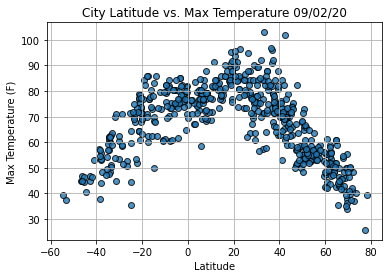

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

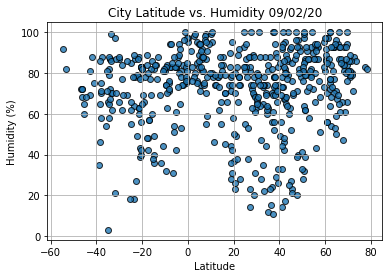

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

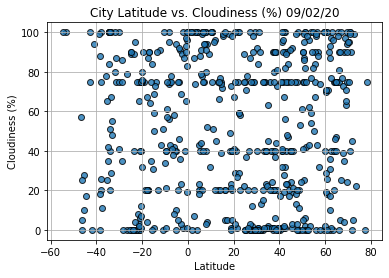

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

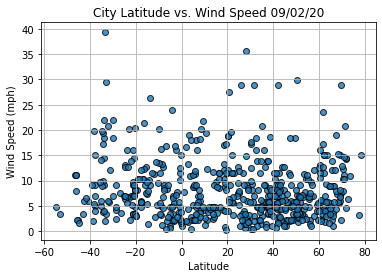

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [39]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

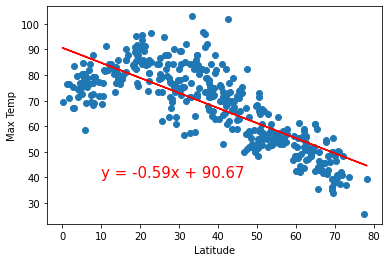

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp",(10,40))


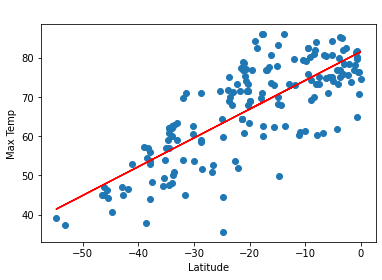

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

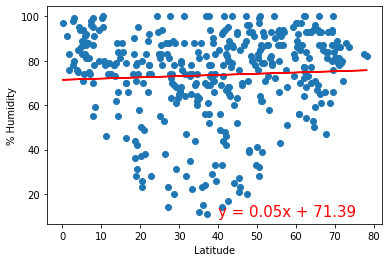

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Humidity", '% Humidity',(40,10))

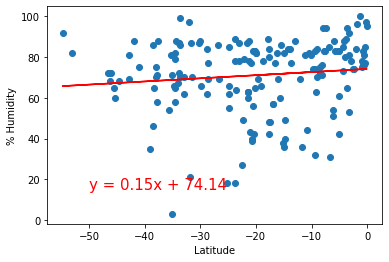

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

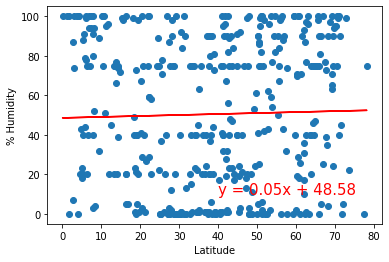

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Humidity", '% Humidity',(40,10))

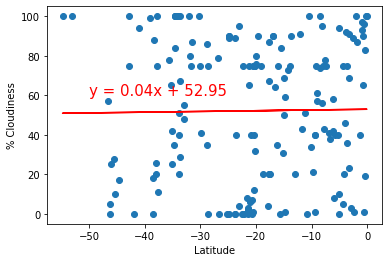

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Cloudiness", "% Cloudiness",(-50,60))

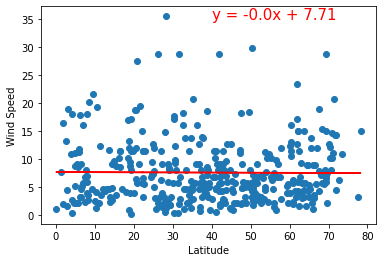

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

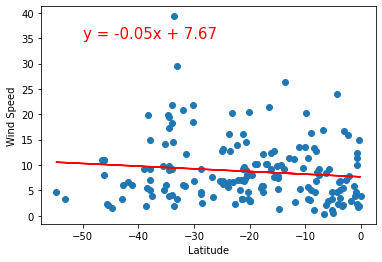

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))